In [1]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the .mat file
mat_data = scipy.io.loadmat('permeability.mat')

# Iterate over the keys and inspect the variables
for key in mat_data:
    variable = mat_data[key]
    if isinstance(variable, np.ndarray):
        print(f"Key: {key}, Shape: {variable.shape}")


Key: Y, Shape: (60, 220)


(60, 220)


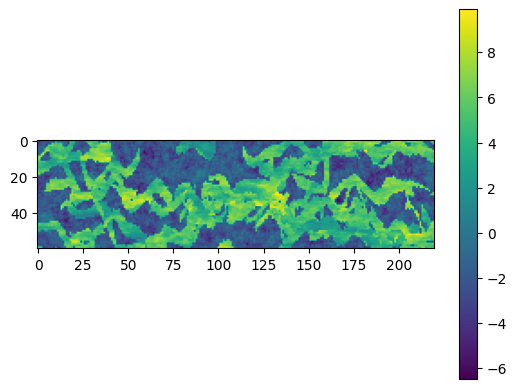

In [3]:
# Load the .mat file
mat = scipy.io.loadmat('permeability.mat')

# Extracting the key from the file
data = mat['Y']

# Quick check on the shape of the data
print(data.shape)  # Should be (60, 220)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Create a heatmap of the data
cax = ax.imshow(data, cmap='viridis')

# Add a colorbar to the plot
fig.colorbar(cax)

# Display the plot
plt.show()


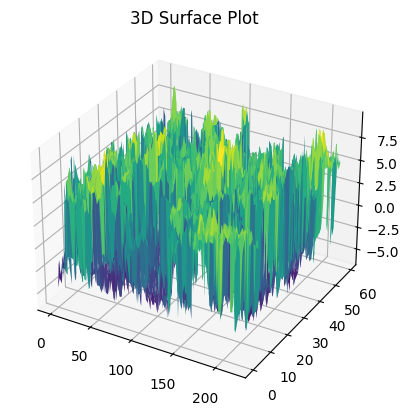

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, data, cmap='viridis')
plt.title('3D Surface Plot')
plt.show()


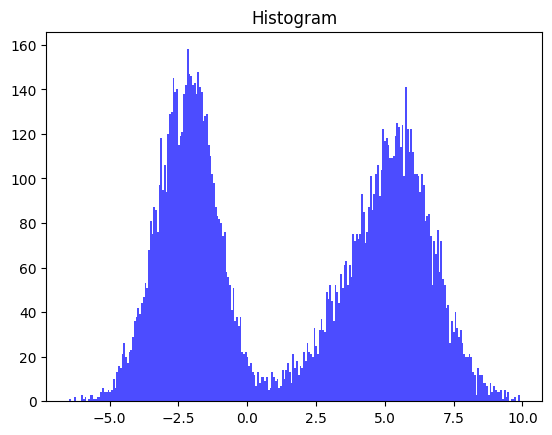

In [6]:
plt.figure()
plt.hist(data.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogram')
plt.show()


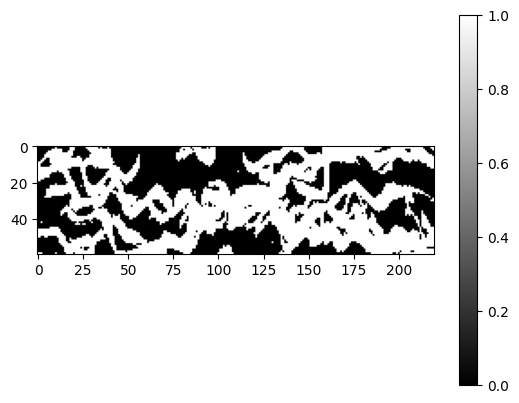

In [8]:
from sklearn.mixture import GaussianMixture

# reshape the data to 1D array
data_1d = data.reshape(-1,1)

# GMM with 2 components (high and low permeability)
gmm = GaussianMixture(n_components=2, random_state=0).fit(data_1d)

# predict the labels for each data point
labels = gmm.predict(data_1d)

# reshape the labels back to the original shape of the data
labels = labels.reshape(data.shape)

# visualize the segmented image
plt.imshow(labels, cmap='gray')
plt.colorbar()
plt.show()


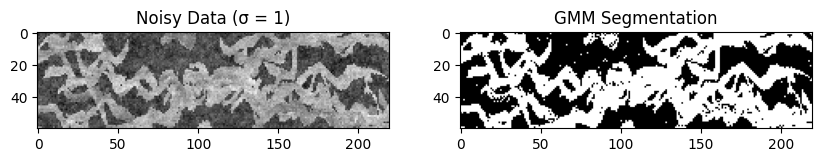

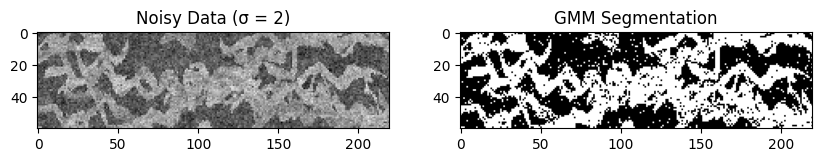

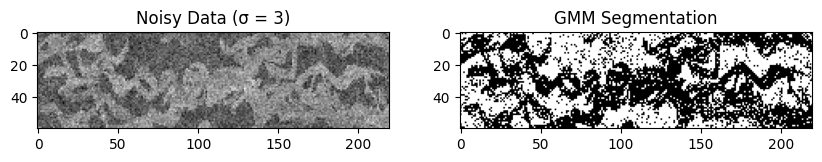

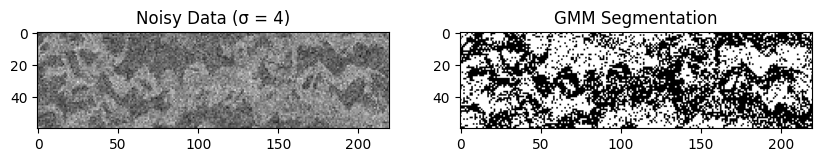

In [9]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Define the standard deviations of the noise
sigmas = [1, 2, 3, 4]

for sigma in sigmas:
    # Generate and add Gaussian noise
    noise = np.random.normal(0, sigma, data.shape)
    data_noisy = data + noise

    # Reshape the data to 1D array for GMM
    data_noisy_1d = data_noisy.reshape(-1,1)

    # GMM with 2 components (high and low permeability)
    gmm = GaussianMixture(n_components=2, random_state=0).fit(data_noisy_1d)
    labels_gmm = gmm.predict(data_noisy_1d).reshape(data.shape)

    # Plot the noisy data and the segmentations
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # changed to 2 subplots

    # Noisy data
    ax[0].imshow(data_noisy, cmap='gray')
    ax[0].set_title(f'Noisy Data (σ = {sigma})')

    # GMM segmentation
    ax[1].imshow(labels_gmm, cmap='gray')
    ax[1].set_title('GMM Segmentation')

    plt.show()
